<a href="https://colab.research.google.com/github/TerriblePepito/TerriblePepitostest/blob/main/tradestypesdraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

# Ouvrir la boîte de dialogue pour télécharger le fichier
uploaded = files.upload()

# Lire le fichier CSV téléchargé dans un DataFrame
for filename in uploaded.keys():
    df = pd.read_csv('Trad2505.csv',delimiter=';', on_bad_lines='warn',encoding='latin-1')  # Importer le fichier CSV
    print(df.head())  # Afficher les premières lignes du DataFrame

Saving Trad2505.csv to Trad2505.csv
  Instrument Volume        Date    P/P
0     OILUSD    -20  04.09.2025   5,81
1     OILUSD    -15  05.01.2025   2,58
2     OILUSD    -20  30.04.2025   6,12
3     OILUSD    -20  05.02.2025  10,35
4     EURUSD  4'000  05.05.2025   1,02


In [2]:
#subgroup of EUR/USD
dfvalue=df.loc[df['Instrument']=='EURUSD',['P/P','Volume']]

In [19]:
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

In [15]:
df['P/P'] = df['P/P'].str.replace(',', '.').astype(float)


In [20]:
print(df.dtypes)

Instrument            object
Volume                object
Date          datetime64[ns]
P/P                  float64
dtype: object


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-21-2374966470>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Instrument', data=df, palette='pastel')


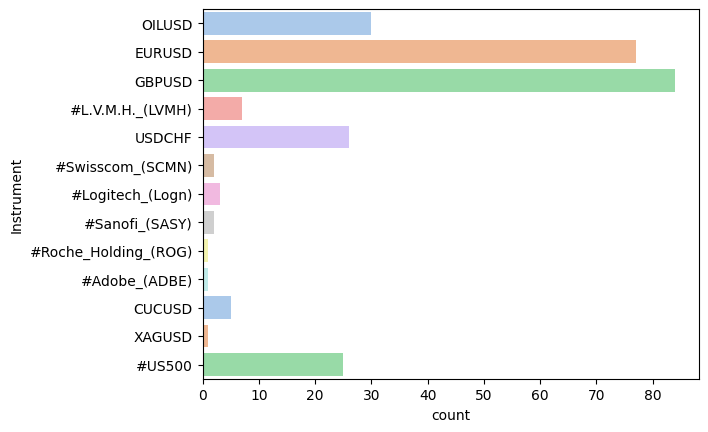

In [21]:
sns.countplot(y='Instrument', data=df, palette='pastel')
plt.show()

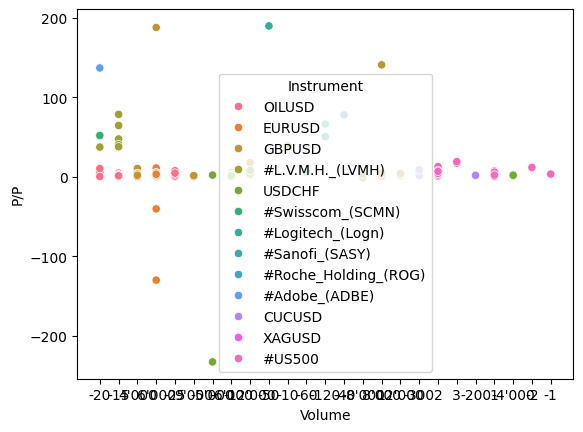

In [23]:
sns.scatterplot(x='Volume', y='P/P', data=df, hue="Instrument")
plt.show()

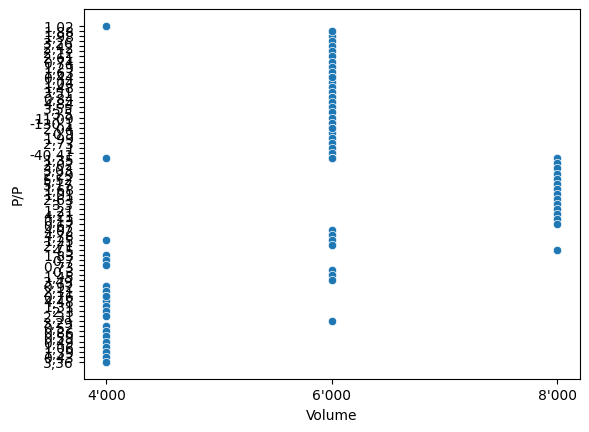

In [24]:
sns.scatterplot(x='Volume', y='P/P', data=dfvalue)
plt.show()

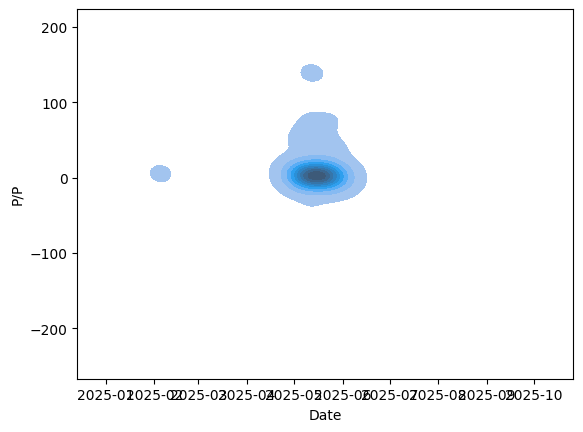

In [25]:
sns.kdeplot(data=df, x="Date", y="P/P", fill=True)
plt.show()

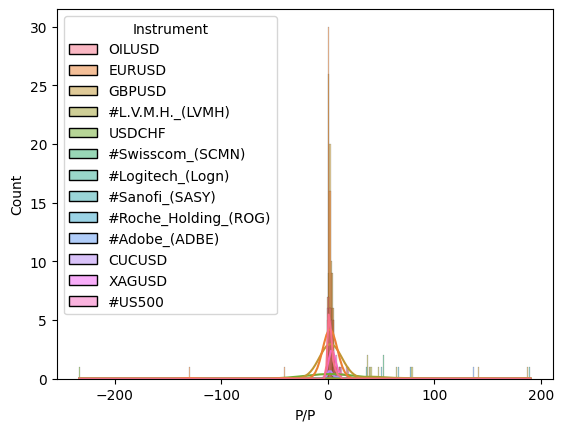

In [26]:
sns.histplot(data=df, x="P/P", kde=True, hue="Instrument")
plt.show()

In [27]:
total_pp_par_instrument = df.groupby('Instrument')['P/P'].sum()
print(total_pp_par_instrument)

Instrument
#Adobe_(ADBE)           137.074
#L.V.M.H._(LVMH)        346.020
#Logitech_(Logn)        232.960
#Roche_Holding_(ROG)     78.000
#Sanofi_(SASY)          116.980
#Swisscom_(SCMN)        104.000
#US500                  143.345
CUCUSD                   15.870
EURUSD                  -13.840
GBPUSD                  546.820
OILUSD                   74.620
USDCHF                 -183.564
XAGUSD                    5.370
Name: P/P, dtype: float64
